

---
> Name : **Deepshikhar Bhardwaj**

> Roll Number : **M20MA004**

---



## **0. General Importing Libaries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**Uploading All the Images**

In [ ]:
img = cv2.imread('barbara.jpg',0)
moon_original = cv2.imread('moon.jpg',0)
cameraman = cv2.imread('cameraman.jpg',0)
xray = cv2.imread('normal-frontal-chest-x-ray.jpg',0)
watermark = cv2.imread('Logo_IITJ.png',0)

#Reshaping to same and small size for Invisible Watermarking
xray_small = np.array(cv2.resize(xray, (300,300)), dtype=int)
watermark_small = np.array(cv2.resize(watermark, (300,300)), dtype=int)

##**1. Filtering**

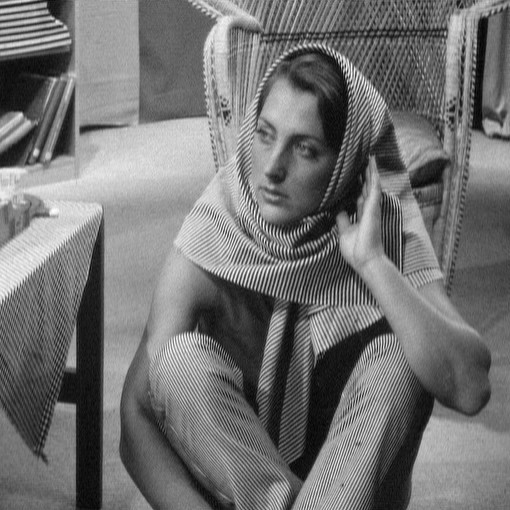

In [ ]:
img = cv2.imread('barbara.jpg',0)
nrow, ncol = img.shape
cv2_imshow(img)

**Filtering using Average Filter : Size 3,7 and 9 respectively**

In [ ]:
def average1(data, filter_size):
    sum = 0
    nrow, ncol = data.shape
    new_image = np.ones([nrow,ncol])
    mask = np.ones([filter_size,filter_size])/(filter_size**2)
    for i in range(nrow-filter_size+1):# 1,508
        for j in range(ncol-filter_size+1):#1,508
            sum = 0
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                         sum = sum + mask[k][m]*data[i+k][j+m]
            new_image[i][j] = sum
    return new_image

Average Filter Size **3**

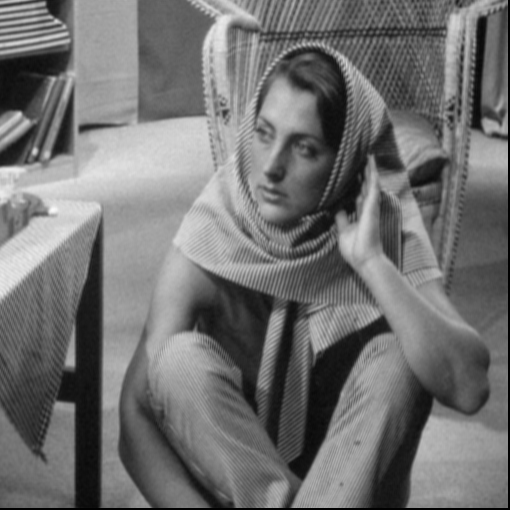

In [ ]:
cv2_imshow((average1(img,3)))

Average Filter Size **7**

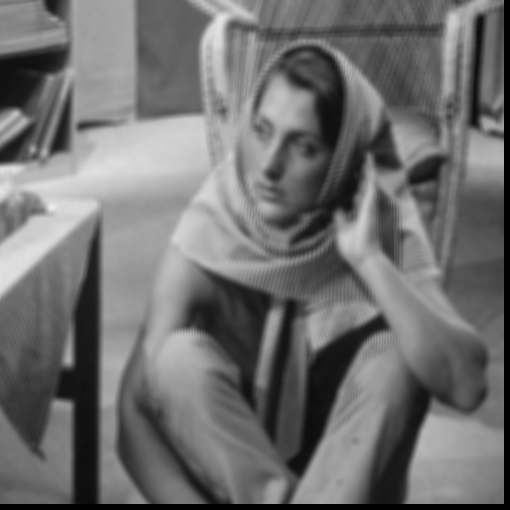

In [ ]:
cv2_imshow((average1(img,7)))

Average Filter Size **9**

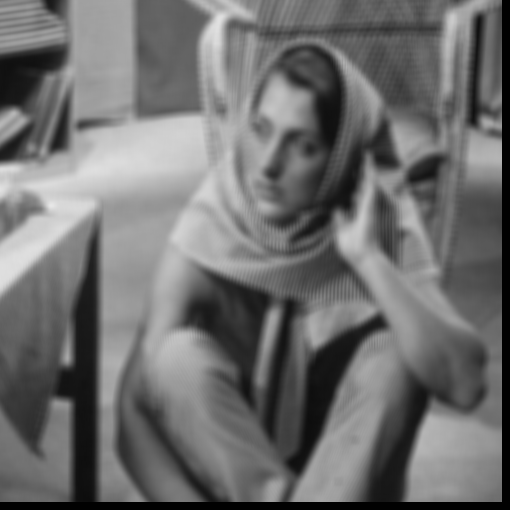

In [ ]:
cv2_imshow((average1(img,9)))

----------------------------------------------------------------------------------------------------------------------------------------------------------------

---

---



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---







**Filtering using Median Filter : Size 3,7 and 9 respectively**

In [ ]:
def median1(data, filter_size):
    nrow, ncol = data.shape
    median_image = np.zeros([nrow,ncol])
    temp = np.zeros([filter_size, filter_size])
    mask = np.ones([filter_size,filter_size])/(filter_size**2)
    for i in range(nrow-filter_size):# 1,508
        for j in range(ncol-filter_size):#1,508
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                         temp[k][m] = data[i+k][j+m]
            temp.sort()
            median_image[i][j] = temp[filter_size//2][filter_size//2]
    return median_image

Median Filter Size **3**

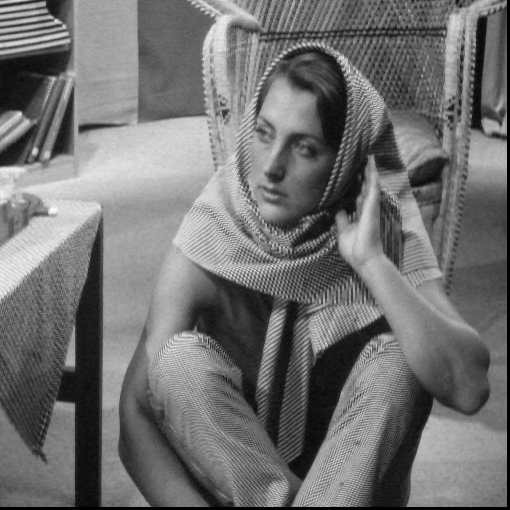

In [ ]:
cv2_imshow((median1(img,3)))

Median Filter Size **7**

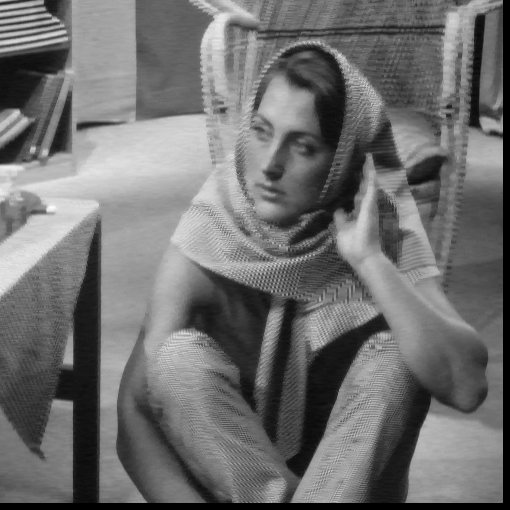

In [ ]:
cv2_imshow((median1(img,7)))

Median Filter Size **9**

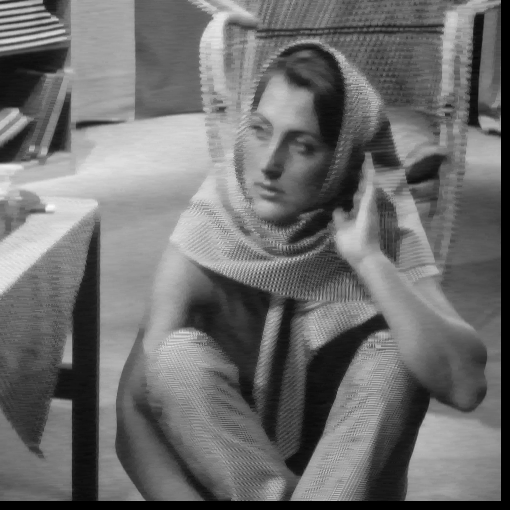

In [ ]:
cv2_imshow((median1(img,9)))

**Comparing between Outputs of Average and Median Filter**

In [ ]:
def mse(imageA, imageB):
	error = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	error = error / (float(imageA.shape[0] * imageA.shape[1]))
	return error

def compare_images(imageA, imageB, title):
	m = mse(imageA, imageB)
	fig = plt.figure(title)
	plt.suptitle(f'MSE Value : {m}')

	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	
	plt.show()

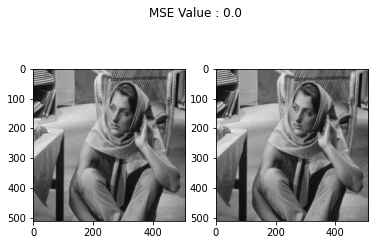

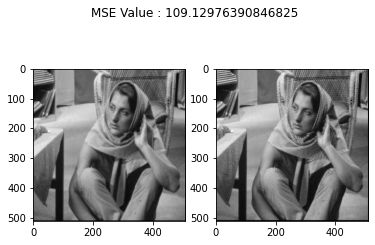

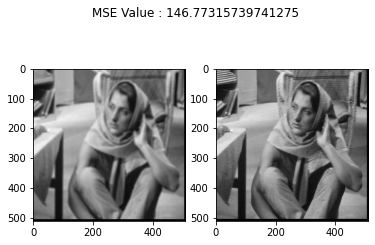

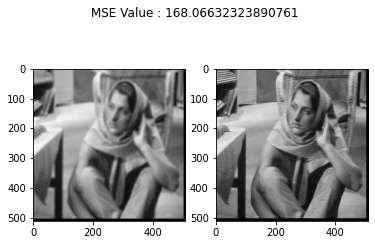

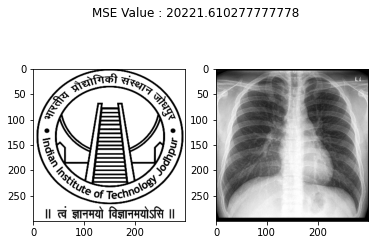

In [ ]:
compare_images(img, img,'Exact Same Image Error Calculation')
compare_images((average1(img,3)), (median1(img,3)),'Similar Images Error Calculation')
compare_images((average1(img,7)), (median1(img,7)),'Similar Images Error Calculation')
compare_images((average1(img,9)), (median1(img,9)),'Similar Images Error Calculation')
compare_images(watermark_small, xray_small,'Complete Different Images Error Calculation')

##**2. Affine Transformation**

**BASIC Level Code for Tranlation of Image by 2 pixels**

In [ ]:
tx = 2
ty=2

dummy = np.zeros([nrow,ncol])
pad_image = np.pad(dummy, pad_width=2, mode='constant', constant_values=0)
translation_matrix = np.array([[1,0,tx],[0,1,ty],[0,0,1]])

def translation1(data, filter_size):
    nrow, ncol = data.shape
    translation_image = np.ones([nrow,ncol])
    for i in range(0,nrow):
        for j in range(0,ncol):
            pad_image[i+2][j] = data[i][j] 
    return pad_image

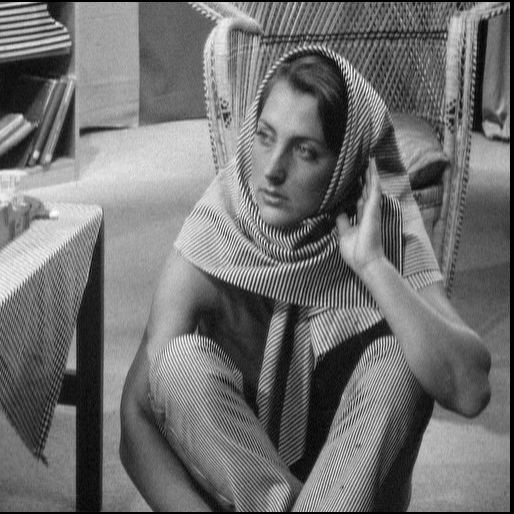

In [ ]:
cv2_imshow(translation1(img,3))

Translation using **Transformation Matrix**

In [ ]:
def translation2(data, filter_size):
    translation_matrix = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
    nrow, ncol = data.shape
    ftranslated_image = np.zeros([nrow,ncol])
    temp = np.ones([filter_size,1])
   
    for row in range(0,nrow-2, 2):
        for column in range(ncol):
            for i in range(filter_size-1):  #0,1
                temp[i] =  i + row
            multiplication_result               = translation_matrix @ temp #3x3 @ 3x1
            flattened_multiplication_result     = np.reshape(multiplication_result.astype(int),(-1))
            p = flattened_multiplication_result[0]
            q = flattened_multiplication_result[1]
            ftranslated_image[row][column] = data[p][column]    #2,0<-0,0   0,0<-2,0
            ftranslated_image[row+1][column] = data[q][column]
 
    return ftranslated_image

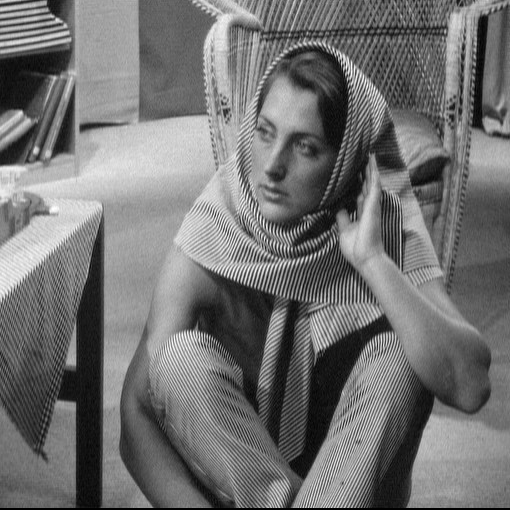

(510, 510)


In [ ]:
translated_result2 = translation2(img,3)
cv2_imshow(translated_result2)
print(translated_result2.shape)

**Scaling Image by 2 times in 'x' direction**

In [ ]:
def scaling1(data, filter_size):
    Sx = 2
    scaling_matrix = np.array([[Sx,0,0],[0,1,0],[0,0,1]])
    nrow, ncol = data.shape
    scaled_image = np.zeros([ nrow, ncol*Sx ])
    temp = np.ones([filter_size,1])
   
    for row in range(nrow):
        for column in range(ncol):
            temp[0] = column
            multiplication_result = scaling_matrix @ temp #3x3 @ 3x1
            flattened_multiplication_result=np.reshape(multiplication_result.astype(int),(-1))
            new_column = flattened_multiplication_result[0]
            scaled_image[row][new_column] = data[row][column]
    return scaled_image

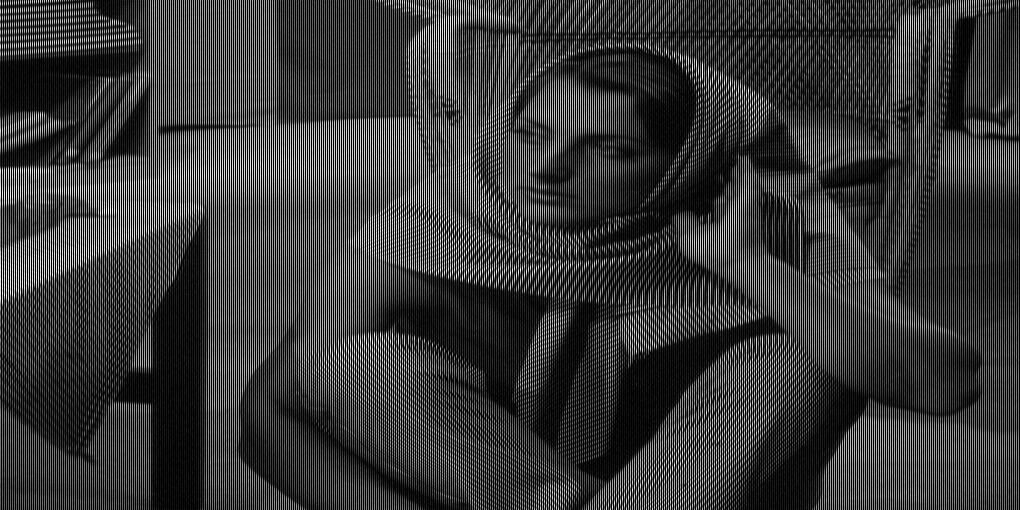

In [ ]:
scaled_result = scaling1(img,3)
cv2_imshow(scaled_result)

**Cropping Image for better Visualization and Experimentation**

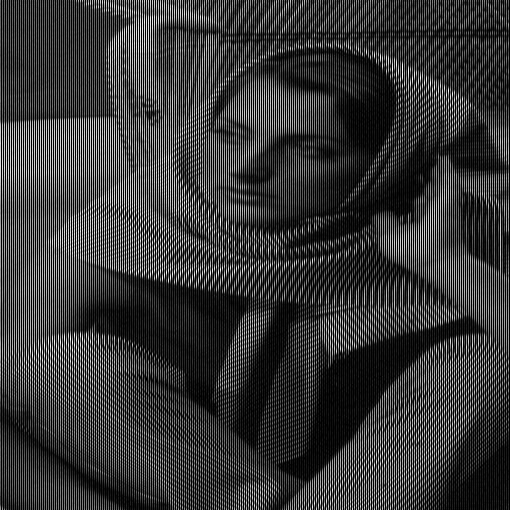

(510, 510)


In [ ]:
zoomed_image = scaled_result[:, 300:810] #: 300+510 = 810
cv2_imshow(zoomed_image)
print(zoomed_image.shape)

**Rotating Image AntiClockwise 30 degrees**

In [ ]:
def rotation1(data, filter_size):

    cos30, sin30 = np.cos(np.radians(-30)), np.sin(np.radians(-30))
    rot_matrix = np.array([[cos30, sin30, 0], [-sin30, cos30, 0], [0, 0, 1]])

    x, y = np.array(data.shape) // 2

    # Translating center to (0, 0)
    trans1 = np.array([[1, 0, -x], [0, 1, -y], [0, 0, 1]])

    # Translating center back to (x, y)
    trans2 = np.array([[1, 0, x], [0, 1, y], [0, 0, 1]])

    # Compose all three transformations together
    trans_matrix = (trans2 @ rot_matrix @ trans1)

    nrow, ncol = data.shape
    rotated_image = np.zeros([nrow,ncol])
    temp = np.ones([filter_size,1])
   
    for row in range(nrow-1):
        for column in range(ncol-1):
            temp[0] = row
            temp[1] = column
            multiplication_result = trans_matrix @ temp     #3x3 @ 3x1
            mul_result=multiplication_result.astype(int)
            mul_res=np.reshape(mul_result,(-1))
            new_row = mul_res[0]
            new_column = mul_res[1]
            if(new_row < nrow) and (new_column < ncol) and ( row >= 0 ) and (column >= 0):
              rotated_image[new_row][new_column] = data[row][column]

    return rotated_image

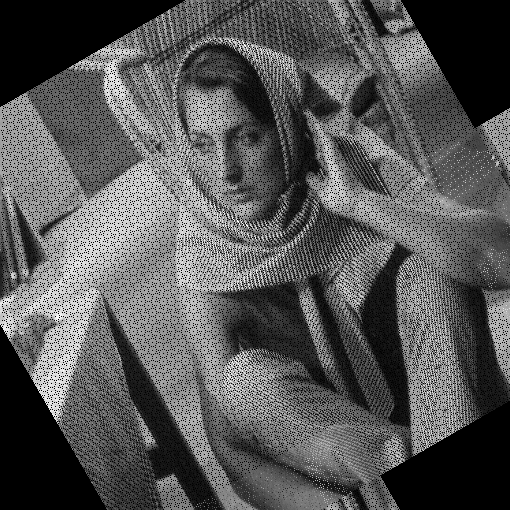

(510, 510)


In [ ]:
rot_result1 = rotation1(img,3)
cv2_imshow(rotation1(img,3))
print(rot_result1.shape)

**Combination of Above all three operations**

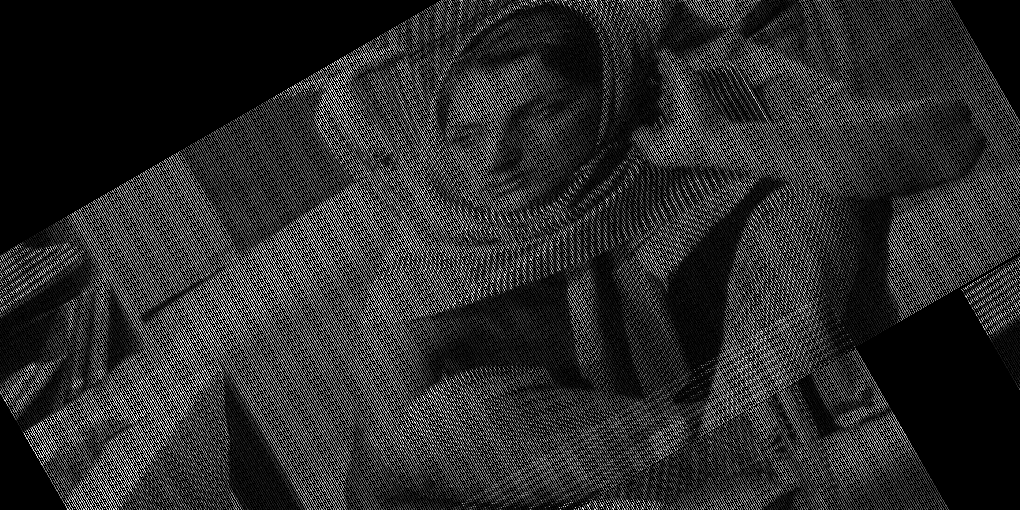

In [ ]:
cv2_imshow(rotation1(scaling1(translation2(img,3),3),3))

**Combination of Translation -> Scaling -> Rotation on Zoomed Image**

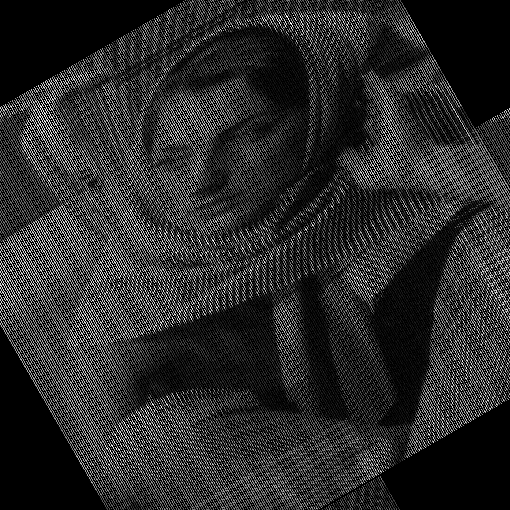

In [ ]:
Translated_Output = translation2(img,3)
Scaled_Output     = scaling1(Translated_Output,3)
Zoomed_Output     = Scaled_Output[:,300:810]            #: 300+510 = 810
Rotated_Output    = rotation1(Zoomed_Output,3)
cv2_imshow(Rotated_Output)

**Combined result with all Matrix Transformation**

In [ ]:
def combined(data, filter_size):
    Sx = 2
    Sy = 1
    tx = 2
    #ty = 2
    scaling_matrix = np.array([[Sx,0,0],[0,1,0],[0,0,1]])
    cos30, sin30 = np.cos(np.radians(-30)), np.sin(np.radians(-30))
    rot_matrix = np.array([[cos30, sin30, 0], [-sin30, cos30, 0], [0, 0, 1]])

    x, y = np.array(data.shape) // 2

    # Translating center to (0, 0)
    trans1 = np.array([[1, 0, -x], [0, 1, -y], [0, 0, 1]])

    # Translating center back to (x, y)
    trans2 = np.array([[1, 0, x], [0, 1, y], [0, 0, 1]])

    trans_matrix = (trans2 @ rot_matrix @ trans1)

    nrow, ncol = data.shape
    combined_image = np.zeros([nrow,ncol])
    temp = np.ones([filter_size,1])

    #combined_matrix = [[cos30*Sx, -sin30*Sy,tx],[sin30*Sx, cos30*Sy,0],[0,0,1]]
   
    for row in range(nrow-1):
        for column in range(ncol-1):
            temp[0] = row
            temp[1] = column

            # Combining all three transformations together
            
            #multiplication_result = combined_matrix  @ temp

            multiplication_result = translation_matrix  @ temp
            multiplication_result = scaling_matrix @ multiplication_result
            multiplication_result = trans_matrix @ multiplication_result    #3x3 @ 3x1

            mul_result=multiplication_result.astype(int)
            mul_res=np.reshape(mul_result,(-1))
            new_row = mul_res[0]
            new_column = mul_res[1]
            if(new_row < nrow) and (new_column < ncol) and ( row >= 0 ) and (column >= 0):
              combined_image[new_row][new_column] = data[row][column]

    return combined_image

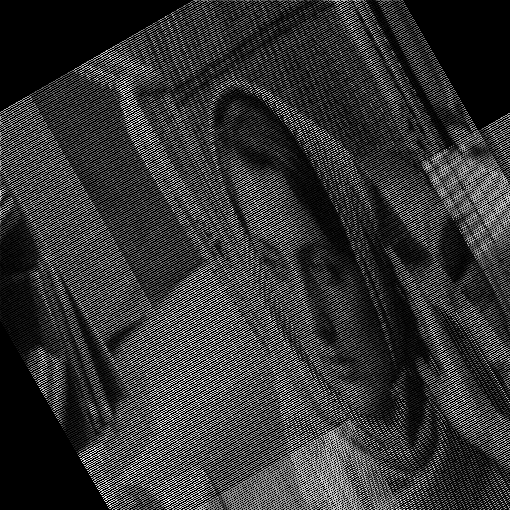

In [ ]:
combined_result = combined(img,3)
cv2_imshow(combined(img,3))

##**3. Image Sharping using Laplacian**

In [ ]:
moon_original = cv2.imread('moon.jpg',0)

In [ ]:
#Reshaping the original Image to smaller image as output section seems to be bulky :) 
moon = np.array(cv2.resize(moon_original, (300,300)), dtype=int)

**Defining Laplacian Function for generalised mask size**

In [ ]:
def laplacian(data, filter_size):
    nrow, ncol = data.shape
    laplacian_image = np.zeros([nrow,ncol])
    temp = np.zeros([filter_size, filter_size])
    laplacian_mask = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    
    for i in range(nrow-filter_size+1):# 1,508
        for j in range(ncol-filter_size+1):#1,508
            sum = 0
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                         sum = sum + laplacian_mask[k][m]*data[i+k][j+m]
            laplacian_image[i][j] = sum
    return laplacian_image

Sharpened Image with Laplacian Filter of size **3**

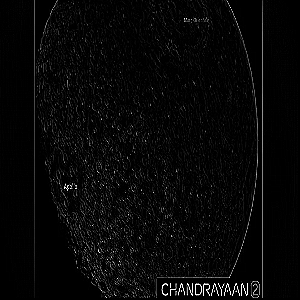

In [ ]:
laplacian_output = laplacian(moon,3)
cv2_imshow(laplacian_output)

**Adding Laplacian Output to the Original Image**

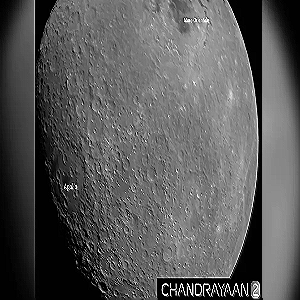

In [ ]:
laplacian_sharpened_output = laplacian_output + moon
cv2_imshow(moon + laplacian_output)

**Defining Derivative of Gaussian Function for generalised mask size**

In [ ]:
def derivative_of_gaussian(data, filter_size):
    nrow, ncol = data.shape
    derivative_of_gaussian_image = np.zeros([nrow,ncol])
    temp = np.zeros([filter_size, filter_size])
    derivative_of_gaussian_mask = np.array([[-1,2,-1],[2,-4,2],[-1,2,-1]])
    for i in range(nrow-filter_size):# 1,508
        for j in range(ncol-filter_size):#1,508
            sum = 0
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                    if i>0 and j>0 and k > 0 and m>0:
                        sum = sum + derivative_of_gaussian_mask[k][m]*data[i+k][j+m]
            derivative_of_gaussian_image[i][j] = sum
    return derivative_of_gaussian_image

Sharpened Image with Derivative of Gaussian Filter of size **3**

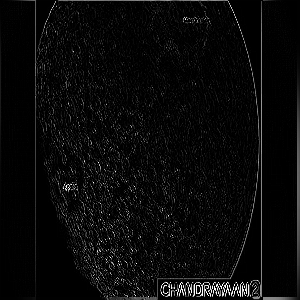

In [ ]:
derivative_of_gaussian_output = derivative_of_gaussian(moon,3) + moon 
cv2_imshow( derivative_of_gaussian_output )

**Comparing Laplacian Filter with the Derivative of the Gaussian**

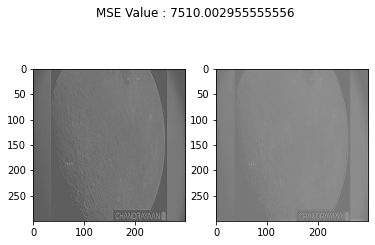

In [ ]:
compare_images(laplacian_sharpened_output, derivative_of_gaussian_output + moon  ,'Sharpening Filters')

Sobel

In [ ]:
def sobel(data, filter_size):
    nrow, ncol = data.shape
    sobel_image = np.zeros([nrow,ncol])
    temp = np.zeros([filter_size, filter_size])
    sobel_mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    for i in range(nrow-filter_size):# 1,508
        for j in range(ncol-filter_size):#1,508
            sum = 0
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                    if i>0 and j>0 and k > 0 and m>0:
                        sum = sum + sobel_mask[k][m]*data[i+k][j+m]
            sobel_image[i][j] = sum
    return sobel_image

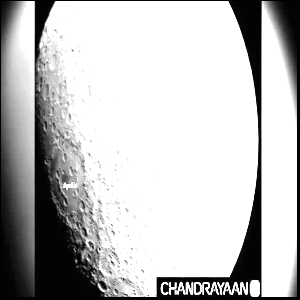

In [ ]:
sobel_output = sobel(moon,3)
cv2_imshow( sobel_output )

##**4. DWT**

In [ ]:
cameraman = cv2.imread('cameraman.jpg',0)

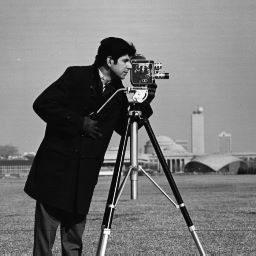

In [ ]:
cv2_imshow(cameraman)

**DWT with Haar Filter**

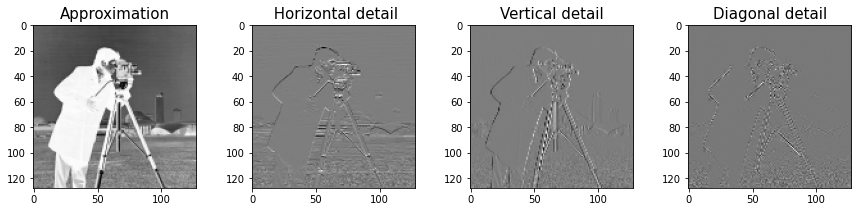

In [ ]:
import pywt
import pywt.data

coeffs2 = pywt.dwt2(cameraman, 'haar')
LL1, (LH1, HL1, HH1) = coeffs2

fig = plt.figure(figsize=(15, 3))
titles = ['Approximation', ' Horizontal detail','Vertical detail', 'Diagonal detail']
for i, a in enumerate([LL1, LH1, HL1, HH1]):
    sub_graphs = fig.add_subplot(1, 4, i + 1)
    sub_graphs.imshow(a, cmap=plt.cm.gist_gray_r)
    sub_graphs.set_title(titles[i], fontsize=15)
plt.show()

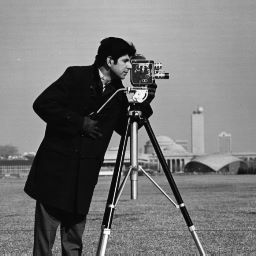

In [ ]:
#INVERSE DWT
reconstructed_cameraman = pywt.idwt2(coeffs2, 'haar')
cv2_imshow(pywt.idwt2(coeffs2, 'haar'))

**Checking for Interest..!!**

In [ ]:
if cameraman is reconstructed_cameraman:
    print('Original Image and Reconstructed Image are Exactly same')
else:
    print('Original and Reconstructed Image are different BUT looks almost same')

Original and Reconstructed Image are different BUT looks almost same


**DWT using DB9/7**

**NOTE :** Using DB 9/7 as **bior4.4** as per pywt discussion forum : 

---



https://dsp.stackexchange.com/questions/328/what-properties-make-certain-wavelets-better-than-others-in-image-compression 


---


https://github.com/PyWavelets/pywt/issues/176

---



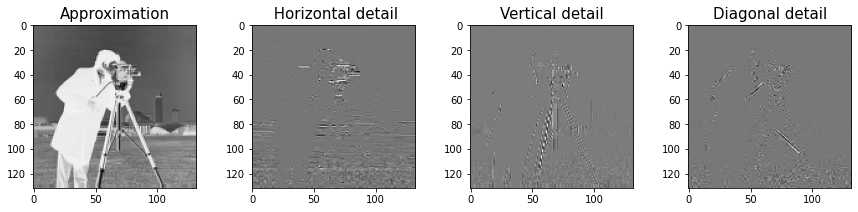

In [ ]:
import pywt
import pywt.data

#coeffs2 = pywt.dwt2(cameraman, 'db9')
coeffs2 = pywt.dwt2(cameraman, 'bior4.4')
LL2, (LH2, HL2, HH2) = coeffs2

fig = plt.figure(figsize=(15, 3))
titles = ['Approximation', ' Horizontal detail','Vertical detail', 'Diagonal detail']
for i, a in enumerate([LL2, LH2, HL2, HH2]):
    sub_graphs = fig.add_subplot(1, 4, i + 1)
    sub_graphs.imshow(a, cmap=plt.cm.gist_gray_r)
    sub_graphs.set_title(titles[i], fontsize=15)
plt.show()

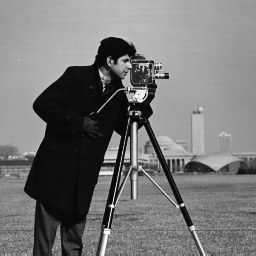

In [ ]:
#INVERSE DWT
reconstructed_cameraman = pywt.idwt2(coeffs2, 'bior4.4')
cv2_imshow(pywt.idwt2(coeffs2, 'bior4.4'))

**Comparing Wavelet Coefficients from Haar and DB 9/7 Filters**

In [ ]:
LL1 = np.array(cv2.resize(LL1, (300,300)), dtype=int)
LL2 = np.array(cv2.resize(LL2, (300,300)), dtype=int)

LH1 = np.array(cv2.resize(LH1, (300,300)), dtype=int)
LH2 = np.array(cv2.resize(LH2, (300,300)), dtype=int)

HL1 = np.array(cv2.resize(HL1, (300,300)), dtype=int)
HL2 = np.array(cv2.resize(HL2, (300,300)), dtype=int)

HH1 = np.array(cv2.resize(HH1, (300,300)), dtype=int)
HH2 = np.array(cv2.resize(HH2, (300,300)), dtype=int)

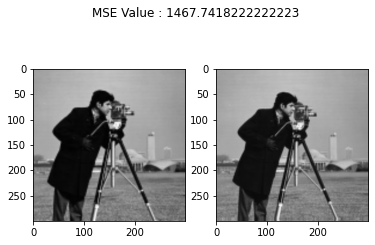

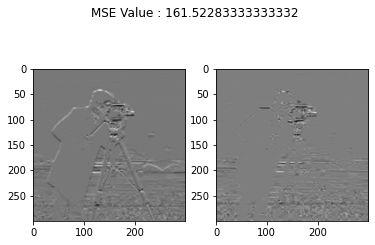

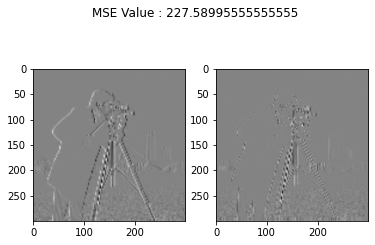

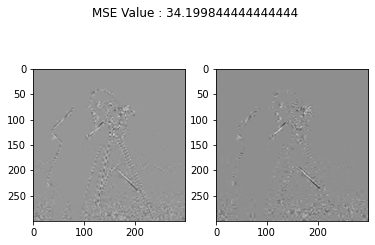

In [ ]:
compare_images(LL1,LL2,'Approximation')
compare_images(LH1,LH2,'Horizontal Details')
compare_images(HL1,HL2,'Vertical Details')
compare_images(HH1,HH2,'Diagonal Details')

**Creating Gaussian Filter of size 3x3**

In [ ]:
#Gaussian Filter
def gaussian1(data, filter_size):
    nrow, ncol = data.shape
    gaussian_image = np.zeros([nrow,ncol])
    temp = np.zeros([filter_size, filter_size])
    gaussian_mask = np.array([[1,2,1],[2,4,2],[1,2,1]])
    for i in range(nrow-filter_size+1):# 1,508
        for j in range(ncol-filter_size+1):#1,508
            sum = 0
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                         sum = sum + gaussian_mask[k][m]*data[i+k][j+m]
            gaussian_image[i][j] = sum
    return gaussian_image

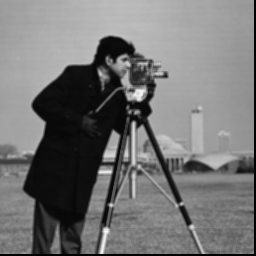

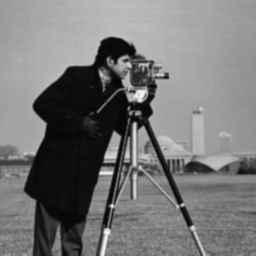

In [ ]:
#cv2_imshow((gaussian1(cameraman,3)))
cv2_imshow(average1(cameraman,3))
original_gaussian_blur = cv2.GaussianBlur(cameraman,(3,3),0)
reconstructed_gaussian_blur = cv2.GaussianBlur(reconstructed_cameraman,(3,3),0)
cv2_imshow(reconstructed_gaussian_blur)

**Compare between the Gaussian Smoothing Filter and Reconstructed Smoothed Image using Average and Gaussian Filter**

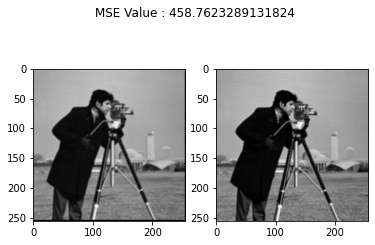

In [ ]:
compare_images(average1(cameraman,3),original_gaussian_blur,'Similar Type of Images')

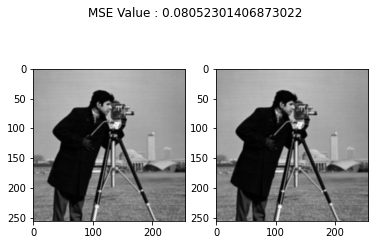

In [ ]:
compare_images(reconstructed_gaussian_blur,original_gaussian_blur,'Similar Type of Images')

##**5. Invisible Watermarking**

In [ ]:
xray = cv2.imread('normal-frontal-chest-x-ray.jpg',0)
watermark = cv2.imread('Logo_IITJ.png',0)

In [ ]:
#Reshaping to same and small size for Invisible Watermarking
xray_small = np.array(cv2.resize(xray, (300,300)), dtype=int)
watermark_small = np.array(cv2.resize(watermark, (300,300)), dtype=int)

In [ ]:
coeffs2 = pywt.dwt2(xray_small, 'haar')
LL1, (LH1, HL1, HH1) = coeffs2
coeffs2 = pywt.dwt2(watermark_small, 'haar')
LL2, (LH2, HL2, HH2) = coeffs2
LH3 = LH1 + (0.1*LH2)
HL3 = HL1 + (0.1*HL2)
HH3 = HH1 + (0.1*HH2)
coeffs3 = LL1,(LH3,HL3,HH3)

In [ ]:
invisible_watermarked_image = pywt.idwt2(coeffs3, 'haar')

Original Image


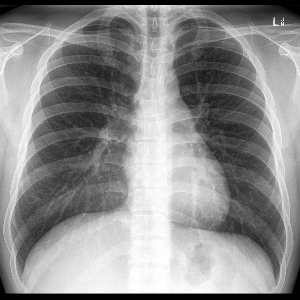



 Invisible Watermarked Image


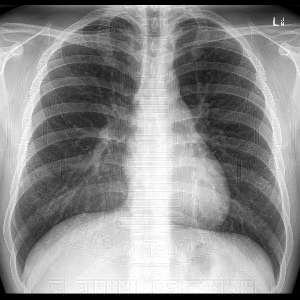

In [ ]:
print('Original Image')
cv2_imshow(xray_small)
print('\n\n Invisible Watermarked Image')
cv2_imshow(invisible_watermarked_image)

**Checking Difference just for Interest**

In [ ]:
if xray_small is invisible_watermarked_image:
    print('Original Image and Reconstructed Image are Exactly same')
else:
    print('Original and Reconstructed Image are different BUT looks almost same')

Original and Reconstructed Image are different BUT looks almost same


**Comparing using MSE**

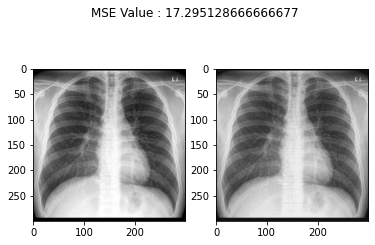

In [ ]:
compare_images(xray_small,invisible_watermarked_image,'Similar Type of Images')

**Testing Visible Watermarking with Alpha Value 0.1**

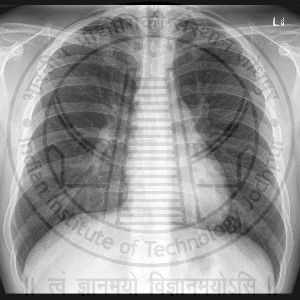

In [ ]:
alpha = 0.1
cv2_imshow( xray_small*(1-alpha) + watermark_small*alpha ) 

**Comparing Visible Watermark using MSE**

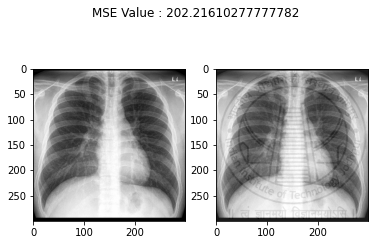

In [ ]:
visible_watermarked_image = xray_small*(1-alpha) + watermark_small*alpha
compare_images(xray_small,visible_watermarked_image,'Similar Type of Images')